# Project 1: Counting words in college subreddits

Due 9/16. Reminder that you are allowed to use any amount of AI assistance or outside resources with citation

## Part 1: word counting and bag of words

In [54]:
#install spacy in the current conda environment
!pip install spacy


In [55]:
#download a small language model to help with cleaning tasks
!python -m spacy download en_core_web_sm



     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------- ------------------------------ 3.1/12.8 MB 16.8 MB/s eta 0:00:01
     --------------------------- ------------ 8.9/12.8 MB 23.1 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 21.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [56]:
#import required libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import spacy
language_model = spacy.load("en_core_web_sm")
import matplotlib.pyplot as plt

import numpy as np

### Problem 1 and example: common words in the Michigan subreddit

In [57]:
mich=pd.read_csv("umich.csv")

In [58]:
mich

,Unnamed: 0,date,post_votes,text,user,com_votes
0,0,2024-09-04 15:33:20,2,"Zingermans has a nice reuben, pretty pricey but the sammies are pretty big",Suspicious-Bad703,2
1,1,2024-09-04 15:33:20,2,I really love Tomokun!,webstbre000,2
2,2,2024-09-04 15:33:20,2,The Seoul is pretty good I especially like their popcorn chicken and crispy rice appetizers!,iaxlmao,1
3,3,2024-09-04 15:33:20,2,A lot of it depends on what type of food and what type of vibe you are looking for. There are a lot of options.,I-696,1
4,4,2024-09-04 14:32:17,1,"You can book completely enclosed private study rooms in Shapiro, just go to the library website. AFAIK, there aren’t places in Hatcher (unless you have special access to certain areas) where you can privately speak out loud on a call because even the private carrels and group study areas are open at the top",sneep_,2
...,...,...,...,...,...,...
8334,8334,2024-07-02 12:35:36,9,It isn’t a student org,Vibes_And_Smiles,1
8335,8335,2024-07-02 11:07:10,0,Life \r\nMatter \r\nLife's matter,tctu,8
8336,8336,2024-07-02 11:07:10,0,google,SUPERazkari,4
8337,8337,2024-07-02 11:07:10,0,That’s a hard question to answer for a set of individuals.,Own-Resident-3837,-1


In [59]:
def clean(text):
    text = ' '.join(text.split())
    text = text.lower()
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

In [60]:
mich['cleaned_text'] = mich['text'].apply(clean)

In [61]:
mich["cleaned_text"][0]

'zingermans has a nice reuben pretty pricey but the sammies are pretty big'

In [62]:
mich["text"][0]

'Zingermans has a nice reuben, pretty pricey but the sammies are pretty big'

In [63]:
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(mich['cleaned_text'])

In [64]:
bag_of_words

<8339x15289 sparse matrix of type '<class 'numpy.int64'>'
	with 221217 stored elements in Compressed Sparse Row format>

In [65]:
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
bow_df

,aa,aadl,aapd,aata,ab,abab,abandon,abandoned,abbreviation,abbreviations,...,zoned,zones,zoning,zoo,zoom,zoomer,zoomers,zuckerberg,𝓲𝓷𝓼𝓮𝓬𝓾𝓻𝓮,𝘢𝘩𝘦𝘮
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8334,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8335,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
word_counts = bow_df.sum()
word_counts = word_counts.sort_values(ascending=False)
word_counts

the            11306
to              8480
and             6921
you             6256
of              5028
               ...  
journals           1
journeywhen        1
jpg                1
js                 1
𝘢𝘩𝘦𝘮               1
Length: 15289, dtype: int64

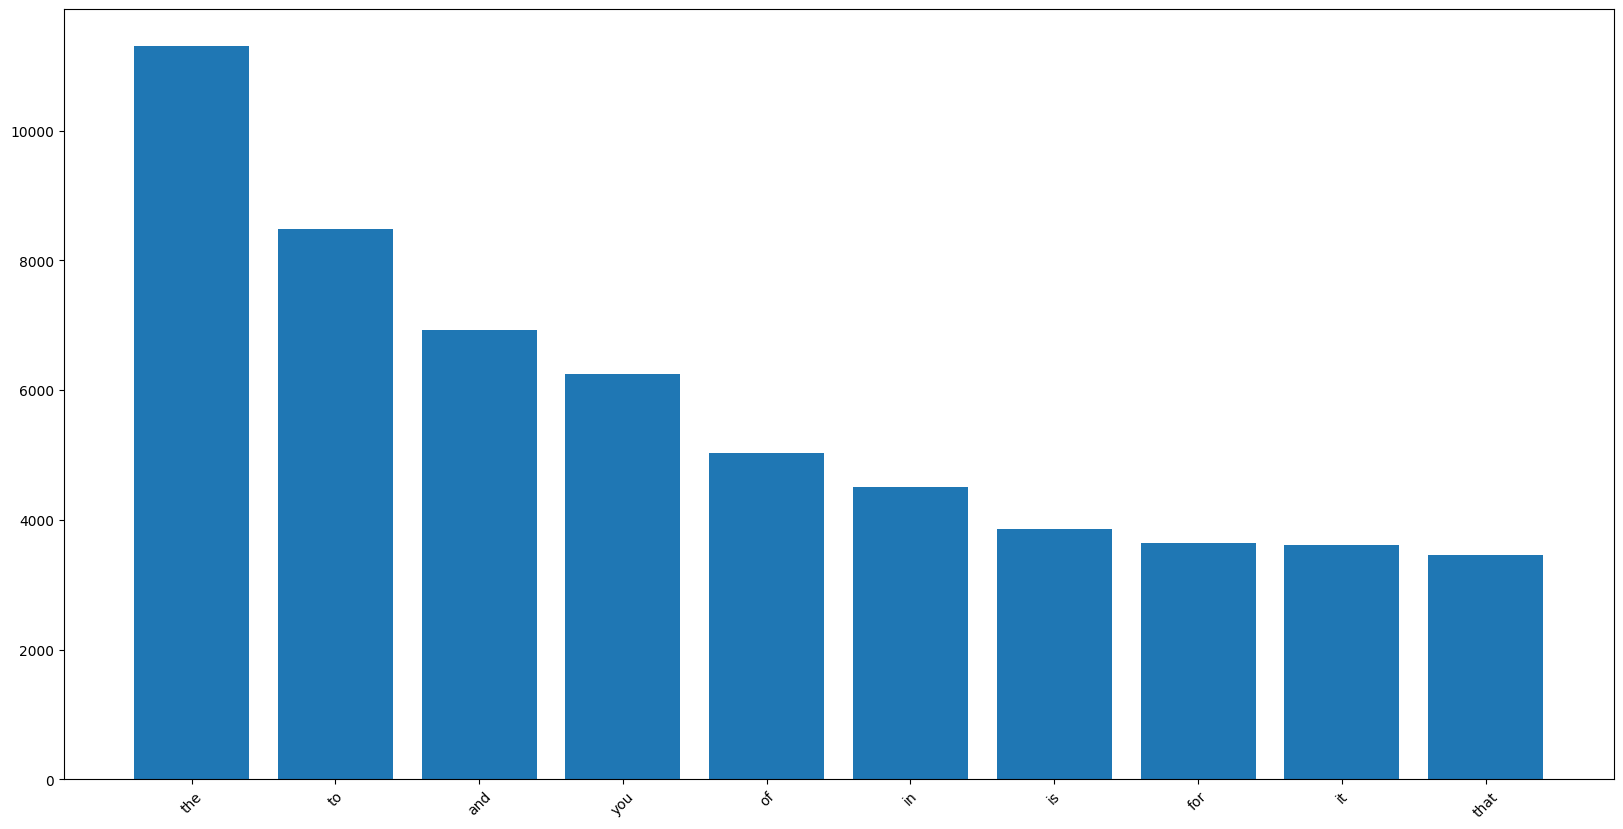

In [67]:
word_counts = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(word_counts.index, word_counts.values)
plt.xticks(rotation=45)
plt.show()

#### Question 1: what do you notice about the words in this plot? Is this useful for studying the community?

I noticed that all of the words in this plot are stop words. Because these words are so common, they don't tell us much about the content of the sentences themselves. This is not useful for studying the community as it does not tell us anything about what is actually being discussed. In order to analyze the content of the sentences themselves, it is important to remove stopwords and lemmatize as well.

#### Lemmatization and stopword removal

In [68]:
def lemmatize(text):

   doc = language_model(text)

   tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]

   return ' '.join(tokens)

In [69]:
mich['lemmatized_text'] = mich['cleaned_text'].apply(lemmatize)

In [70]:
vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_words = vectorizer.fit_transform(mich['lemmatized_text'])

In [71]:
bag_of_words

<8339x8608 sparse matrix of type '<class 'numpy.int64'>'
	with 126768 stored elements in Compressed Sparse Row format>

In [ ]:
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
word_counts = bow_df.sum()
word_counts = word_counts.sort_values(ascending=False)
word_counts

not              2863
student          1183
like             1183
people           1124
class             988
                 ... 
club campus         3
open not            3
open source         3
club activity       3
luck search         3
Length: 8608, dtype: int64

In [73]:
word_counts = word_counts / word_counts.sum()

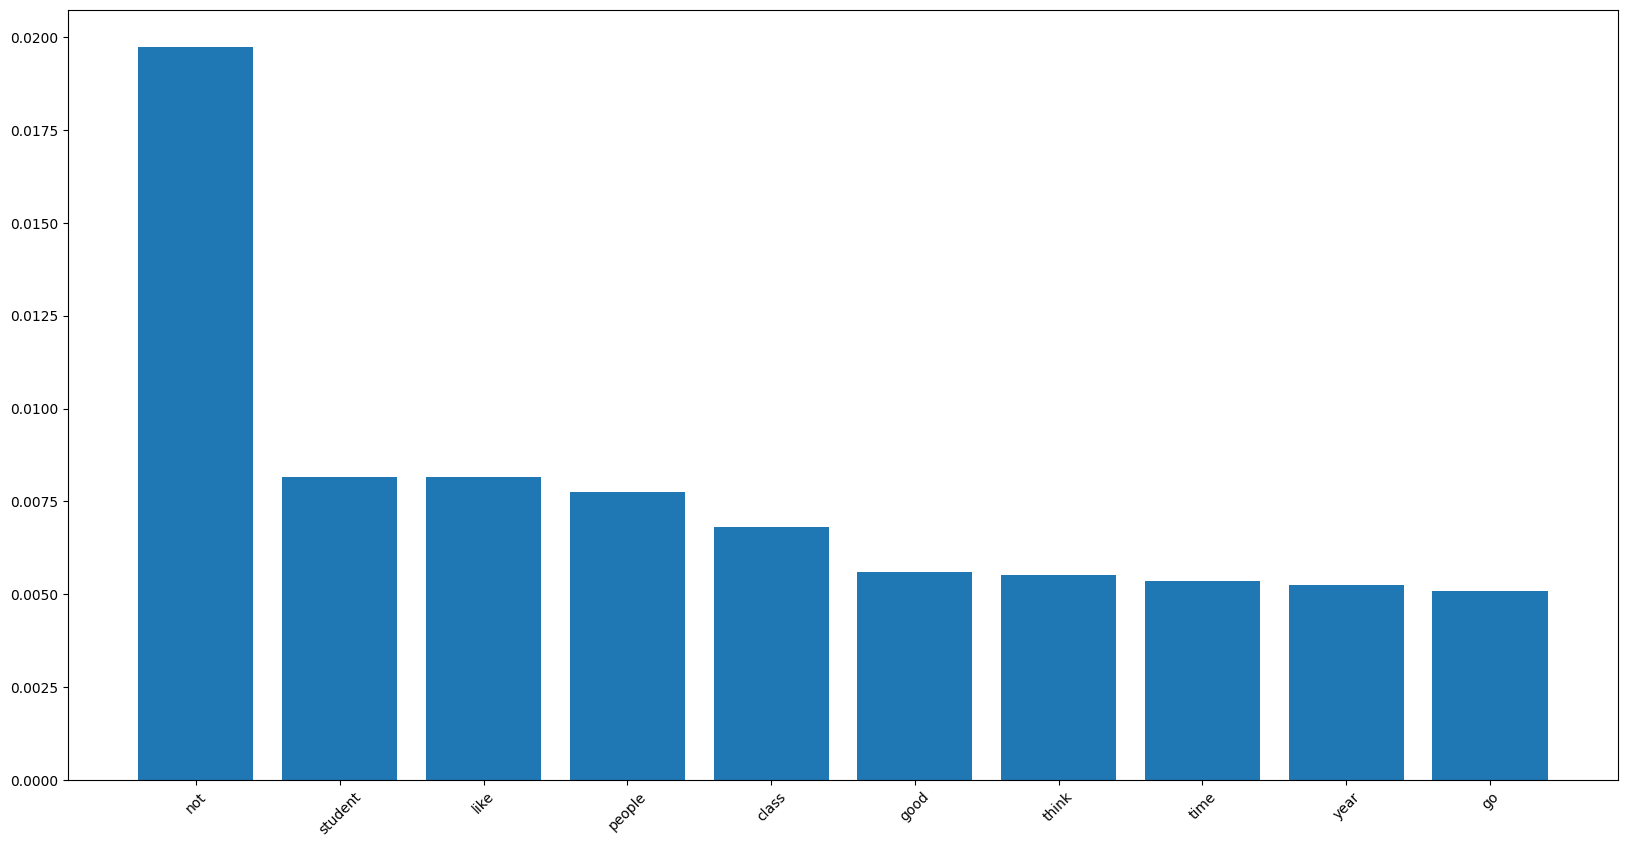

In [ ]:
plot_list = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

In [75]:
word_counts["student loan"]

4.1400153180566765e-05

In [76]:
plot_list=word_counts[["history", "business", "computer science", "cs", "computer"]]
plot_list

history             0.000352
business            0.000600
computer science    0.000035
cs                  0.001228
computer            0.000262
dtype: float64

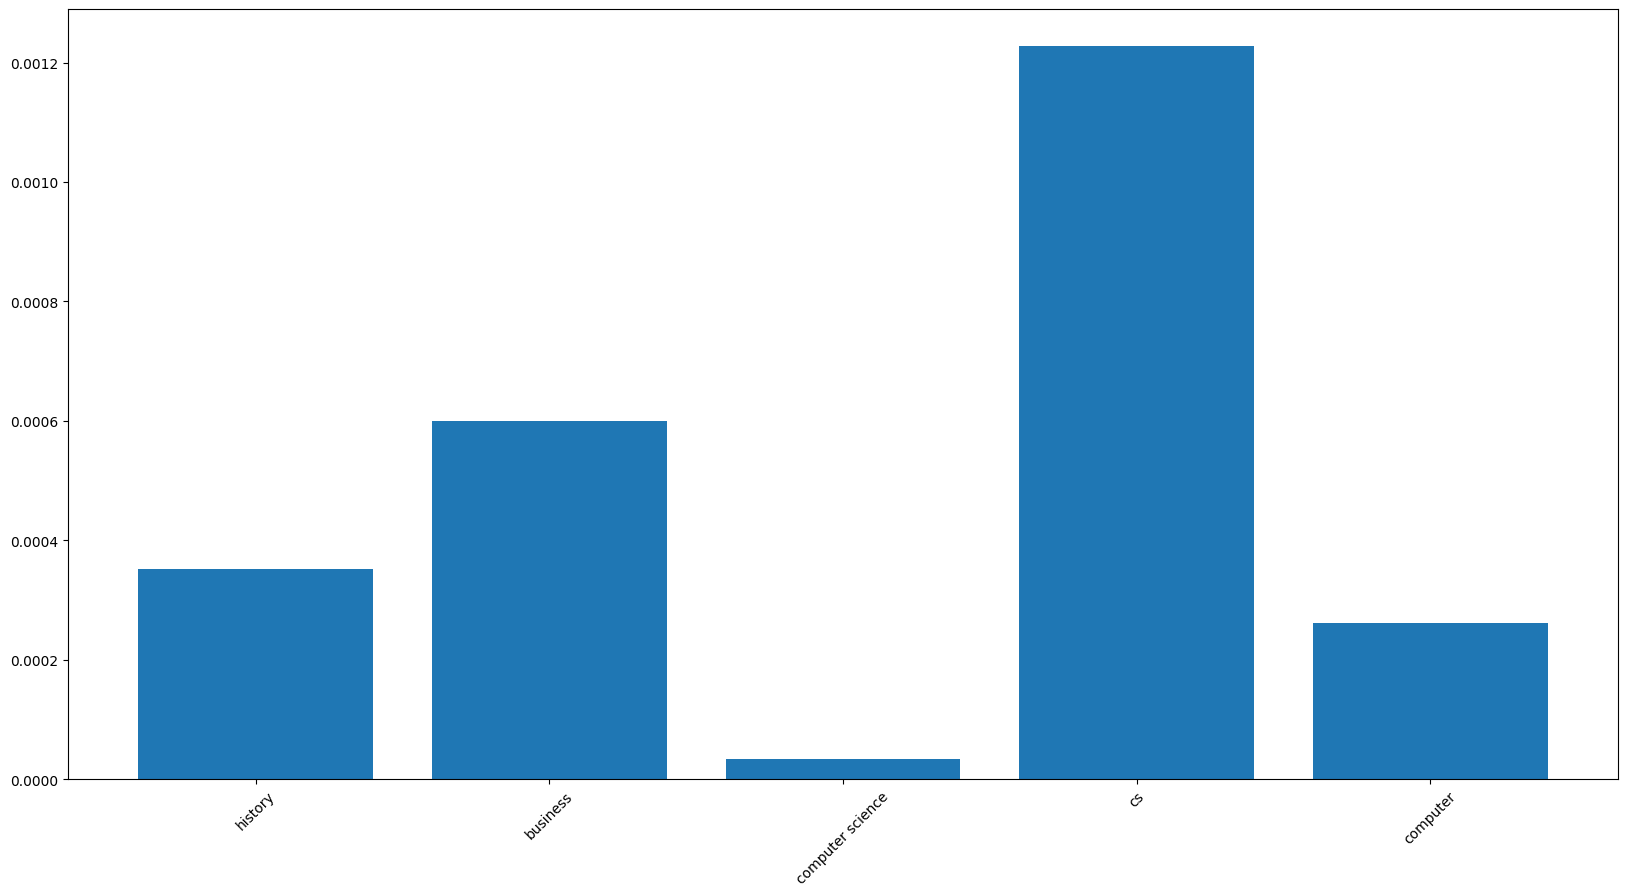

In [77]:

plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

#### Question 2:

In [78]:
#TODO: pick 5 words that you find interesting or are curious about, and plot a bar plot of their frequency in this dataset 

#Below are the 5 words I am interested in examining
*I am interested in these words as I am a psychology major and am wondering how often the words difficult and easy were utalized compared to each other. I was am also interested to see how often individuals were discussing their personal grades and professors on reddit.

In [79]:
plot_list2=word_counts[["psych", "grade", "professor", "difficult", "easy"]]
plot_list2

psych        0.000255
grade        0.000649
professor    0.001511
difficult    0.000635
easy         0.001780
dtype: float64

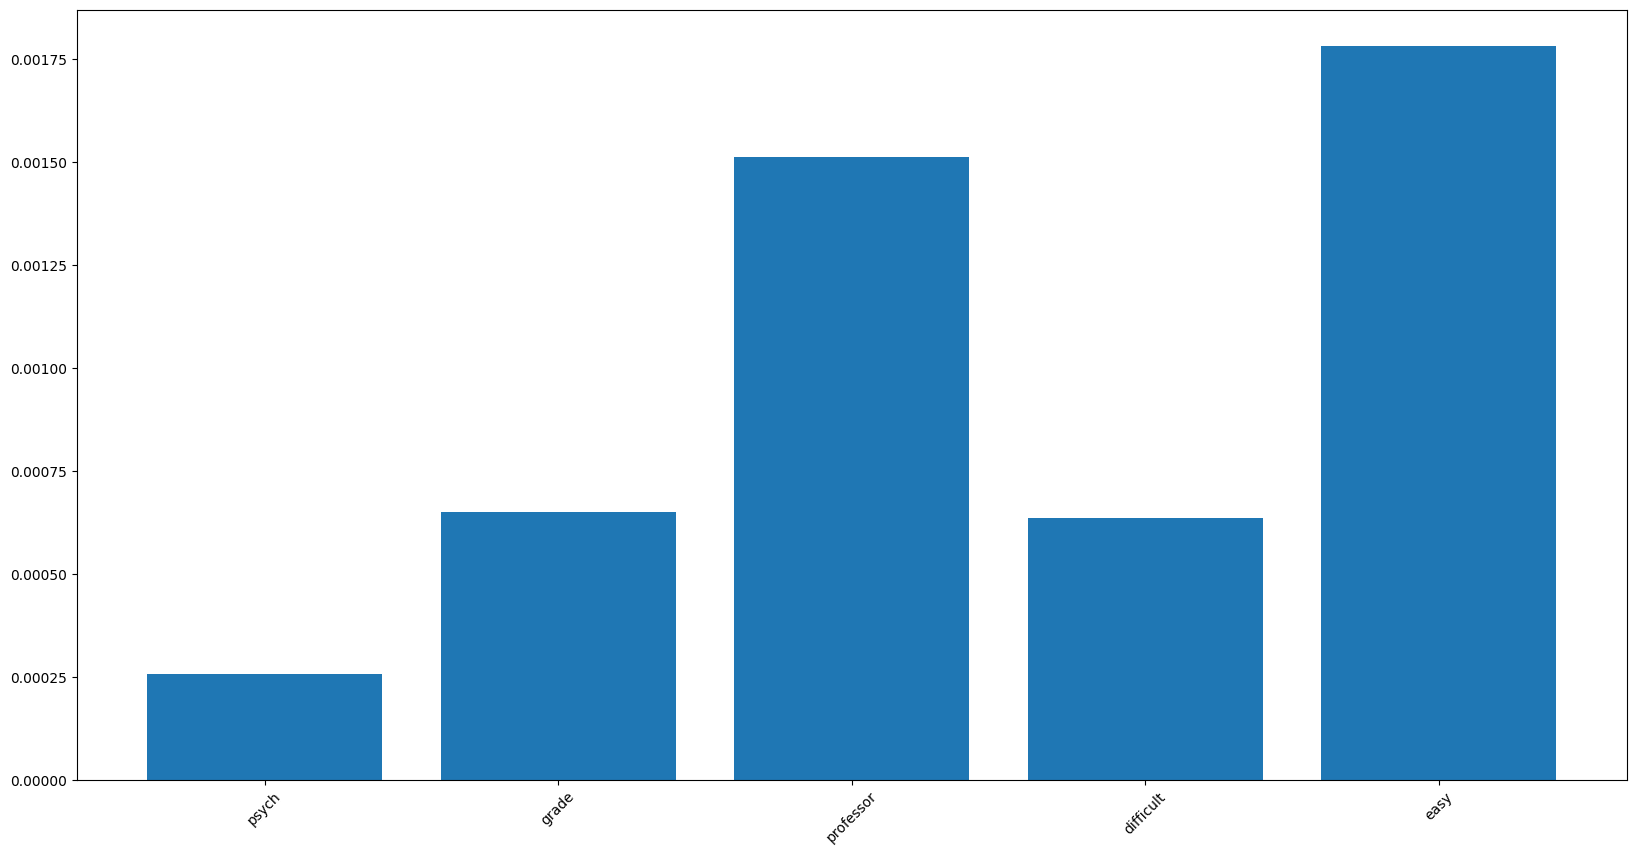

In [80]:
plt.figure(figsize=(20,10))
plt.bar(plot_list2.index, plot_list2.values)
plt.xticks(rotation=45)
plt.show()

### Problem 2: repeat this process with the Illinois subreddit data (in this directory as "uiuc.csv"). You should not have to change too much in the previous code besides the dataframe path and name. Your notebook should include the two bar graphs including and excluding stopwords. Use the same 5 words and compare their relative frequency between the two subreddits. Discuss any interesting differences you notice in a short markdown cell. 

In [81]:
uiuc=pd.read_csv("uiuc.csv")


In [82]:
uiuc

,Unnamed: 0,date,post_votes,text,user,com_votes
0,0,2024-09-04 14:43:40,2,"Have the same professor! And in lecture he did say we were gonna have to learn some of the stuff ourself \r\n\r\nI would recommend using online resources such as Paul’s Online Math Notes and Professor Leonard on YouTube. Personally, I’ve been learning the material from those sources before going to lecture",zhen3441,2
1,1,2024-09-04 14:43:40,2,Do you find it helpful to still go to the lecture? It seems to me that his slides are embedded with mistakes here and there. It makes it more confusing for me to understand him.,Kai2747,1
2,2,2024-09-04 12:52:08,3,Have you tried emailing University Housing to request access?,TurboBKTastic,2
3,3,2024-09-04 12:52:08,3,"Purchasing Illini Cash should get you added to the Non-Resident Meal Plan card access level. These **generally** allow you access to whatever is considered the ""front door"" of the residence hall with access to the dining hall.\r\n\r\nAt PAR, that would be the doors facing the bus stop on the south side of the building. Only the mag stripe reader will work, prox access in (most) of the residence halls is currently only activated for residents with ADA needs.",HoosierCAB,2
4,4,2024-09-04 12:52:08,3,"Just did, thanks for the suggestion! It hadn't occurred to me to do that.",Sector-Both,1
...,...,...,...,...,...,...
4720,4720,2024-08-21 20:28:40,1,Im interested if you're still looking,Accomplished_Fix2409,0
4721,4721,2024-08-21 20:26:15,7,I went to one of the taylor nights. was quite fun even without drinking,student176895,4
4722,4722,2024-08-21 20:21:54,10,"Hey, I’m so sorry to hear that’s happening. If you are a UIUC student, please contact our office at Off-Campus Community Living at [off-campuscommunityliving@illinois.edu](mailto:off-campuscommunityliving@illinois.edu) for resources to help you navigate these issues with your new apartment.",OCCLUIUC,5
4723,4723,2024-08-21 20:21:54,10,"AFAIK, the “cleaning company” that UGroup employs isn’t even a real business. When I had to move units across the hall a couple of years ago, we witnessed what their “cleaning” process looks like—it was a family of three (a mother and her teenage kids) who brought their lunch into the unit to eat while they wiped down the countertops and floors. The apartment was still absolutely filthy from the previous tenants when we got the keys. Fuck UGroup.",perpetuallytired29,3


In [83]:
def clean(text):
    text = ' '.join(text.split())
    text = text.lower()
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

In [147]:
uiuc['cleaned_text'] = uiuc['text'].apply(clean)

In [85]:
uiuc["cleaned_text"][0]

'have the same professor and in lecture he did say we were gonna have to learn some of the stuff ourself i would recommend using online resources such as pauls online math notes and professor leonard on youtube personally ive been learning the material from those sources before going to lecture'

In [86]:
uiuc["text"][0]

'Have the same professor! And in lecture he did say we were gonna have to learn some of the stuff ourself\xa0\r\n\r\nI would recommend using online resources such as Paul’s Online Math Notes and Professor Leonard on YouTube. Personally, I’ve been learning the material from those sources before going to lecture'

In [87]:
vectorizer = CountVectorizer()
bag_of_wordsuiuc = vectorizer.fit_transform(uiuc['cleaned_text'])

In [88]:
bag_of_wordsuiuc

<4725x10109 sparse matrix of type '<class 'numpy.int64'>'
	with 98566 stored elements in Compressed Sparse Row format>

In [89]:
bow_df = pd.DataFrame(bag_of_wordsuiuc.toarray(), columns=vectorizer.get_feature_names_out())
bow_df

,aa,aaa,aaaaah,aaabb,ab,abandoned,abcc,abide,abilities,ability,...,zombie,zone,zones,zoo,zoom,zoomed,봉사를,세계로,숭실,진리와
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4720,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4721,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4722,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4723,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
word_counts = bow_df.sum()
word_counts = word_counts.sort_values(ascending=False)
word_counts

the                                                                                                       4613
to                                                                                                        3629
and                                                                                                       2973
you                                                                                                       2551
of                                                                                                        1854
                                                                                                          ... 
httpswwwwciacomnewsraresquirrelmemorializedonuoficampus                                                      1
httpswwwurbanaillinoisussitesdefaultfilesattachmentslandlordtenantpdf                                        1
httpswwwuoficreditunionorgcreditcreditcardshttpswwwuoficreditunionorgcreditcreditcards                       1
h

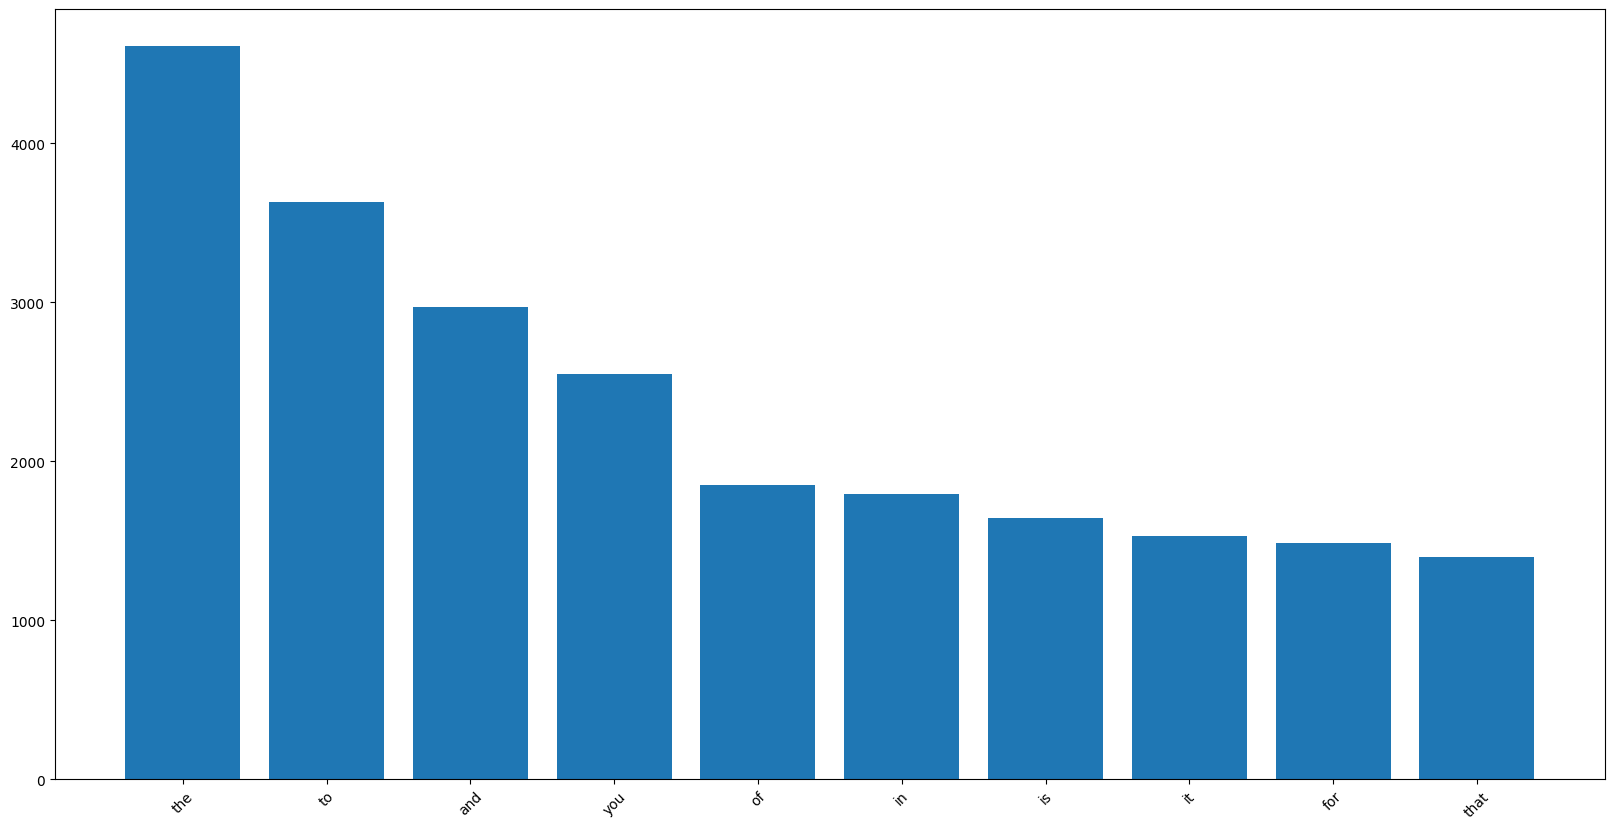

In [91]:
word_counts = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(word_counts.index, word_counts.values)
plt.xticks(rotation=45)
plt.show()

In [92]:
def lemmatize(text):

   doc = language_model(text)

   tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]

   return ' '.join(tokens)

In [195]:
uiuc['lemmatized_text'] = uiuc['cleaned_text'].apply(lemmatize)

In [196]:
vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_words = vectorizer.fit_transform(uiuc['lemmatized_text'])

In [200]:
bag_of_words

<4725x3883 sparse matrix of type '<class 'numpy.int64'>'
	with 49393 stored elements in Compressed Sparse Row format>

In [199]:
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
word_counts = bow_df.sum()
word_counts = word_counts.sort_values(ascending=False)
word_counts

not         1205
like         534
people       481
good         389
time         376
            ... 
marville       3
markdown       3
maps           3
maple          3
luck get       3
Length: 3883, dtype: int64

In [97]:
word_countsuiuc = word_counts / word_counts.sum()

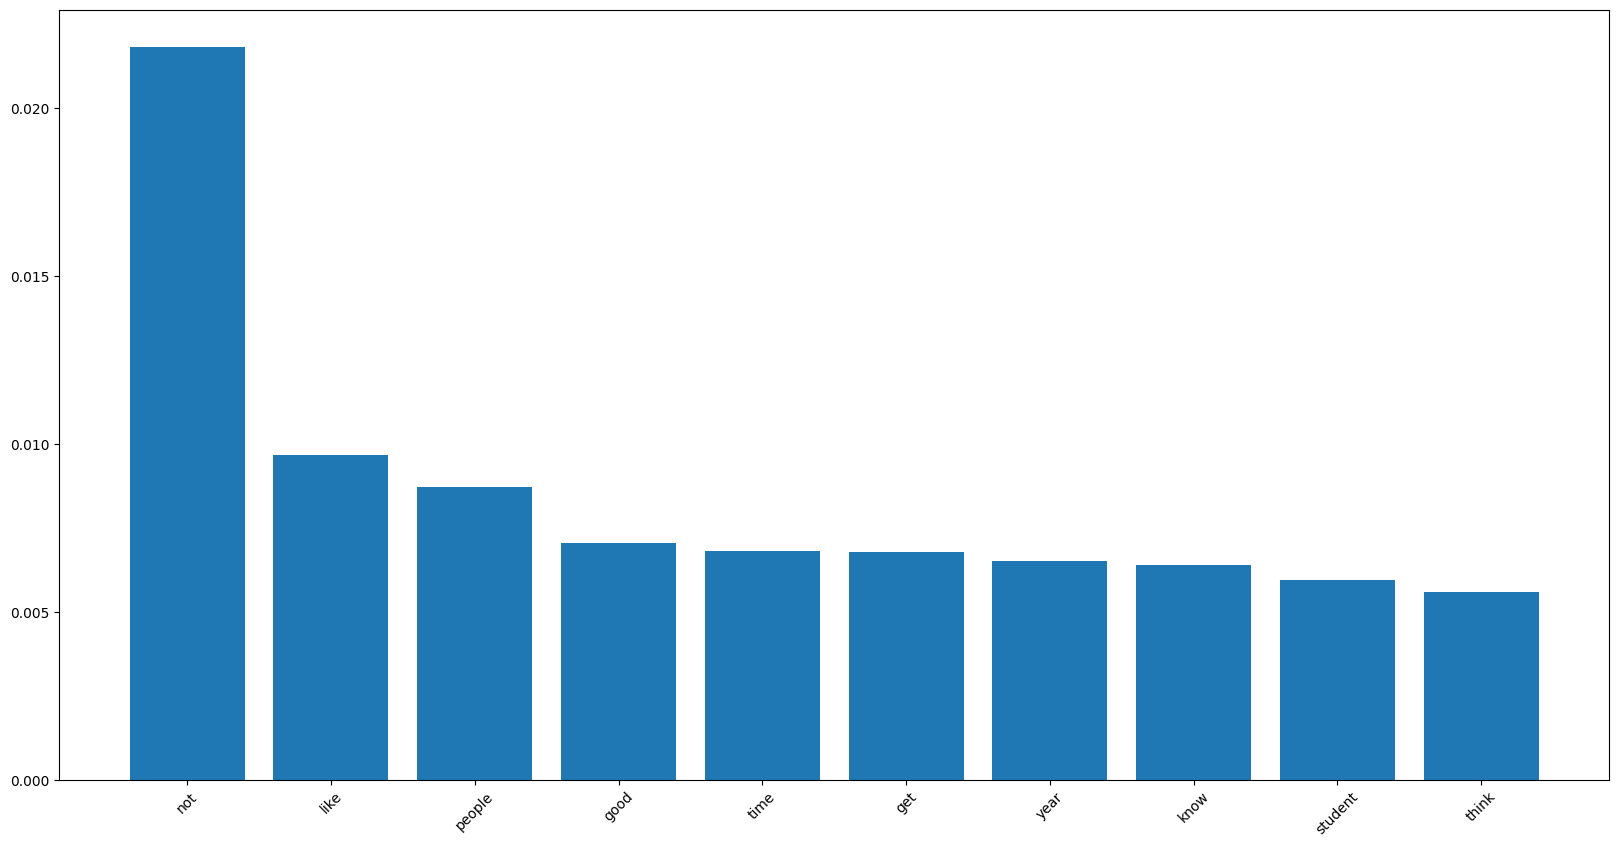

In [98]:
plot_list = word_countsuiuc.head(10)
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

In [99]:
print(word_countsuiuc.index)

Index(['not', 'like', 'people', 'good', 'time', 'get', 'year', 'know',
       'student', 'think',
       ...
       'med', 'meantime', 'mean lot', 'maybe look', 'mate', 'mask sick',
       'marville', 'markdown', 'maps', 'luckily'],
      dtype='object', length=3882)


In [100]:
#ChatGPT aided me in this code 
if 'student loan' in word_countsuiuc.index:
    print(word_countsuiuc["student loan"])
else:
    print("student loan not found")

student loan not found


#Because the exact phrase "student loan" was not found in this dataset, I instead found the count of the word loan which is similar to the phrase "student loan" used in the originial dataset from part 1.

In [144]:
word_countsuiuc["loan"]

0.00014490391059428717

#Computer science was also not in the index for this dataset, so I switched "computer science" to "science."

In [102]:
plot_listuiuc=word_countsuiuc[["history", "business", "science", "cs", "computer"]]
plot_listuiuc

history     0.000344
business    0.000543
science     0.000217
cs          0.001413
computer    0.000290
dtype: float64

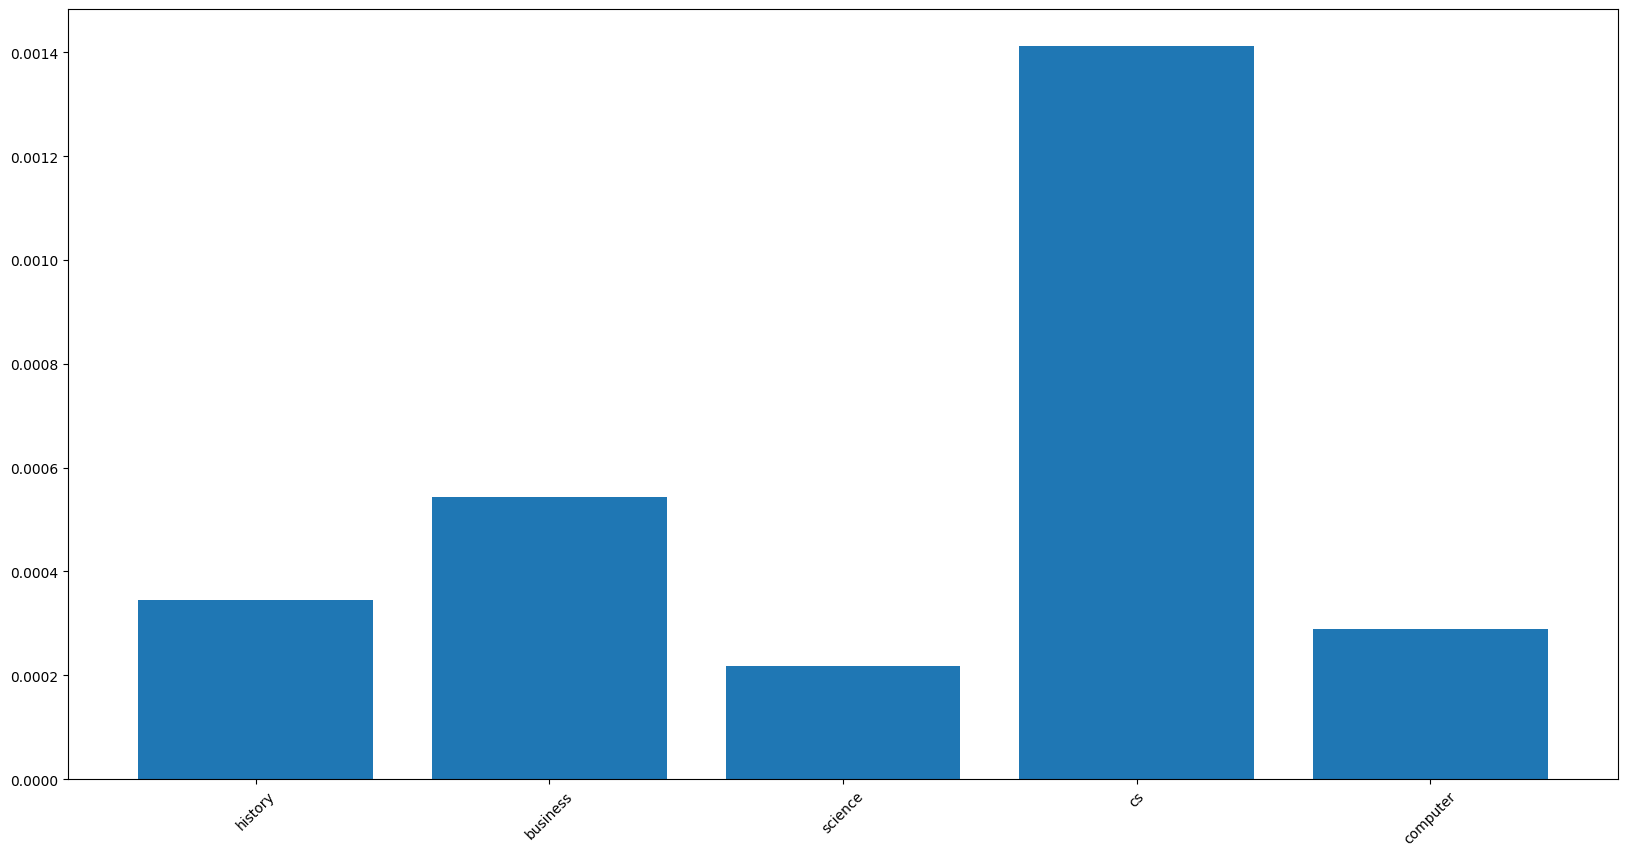

In [103]:
plt.figure(figsize=(20,10))
plt.bar(plot_listuiuc.index, plot_listuiuc.values)
plt.xticks(rotation=45)
plt.show()

In [104]:
plot_list2uiuc=word_countsuiuc[["psych", "grade", "professor", "difficult", "easy"]]
plot_list2uiuc

psych        0.000054
grade        0.000562
professor    0.001123
difficult    0.000471
easy         0.001340
dtype: float64

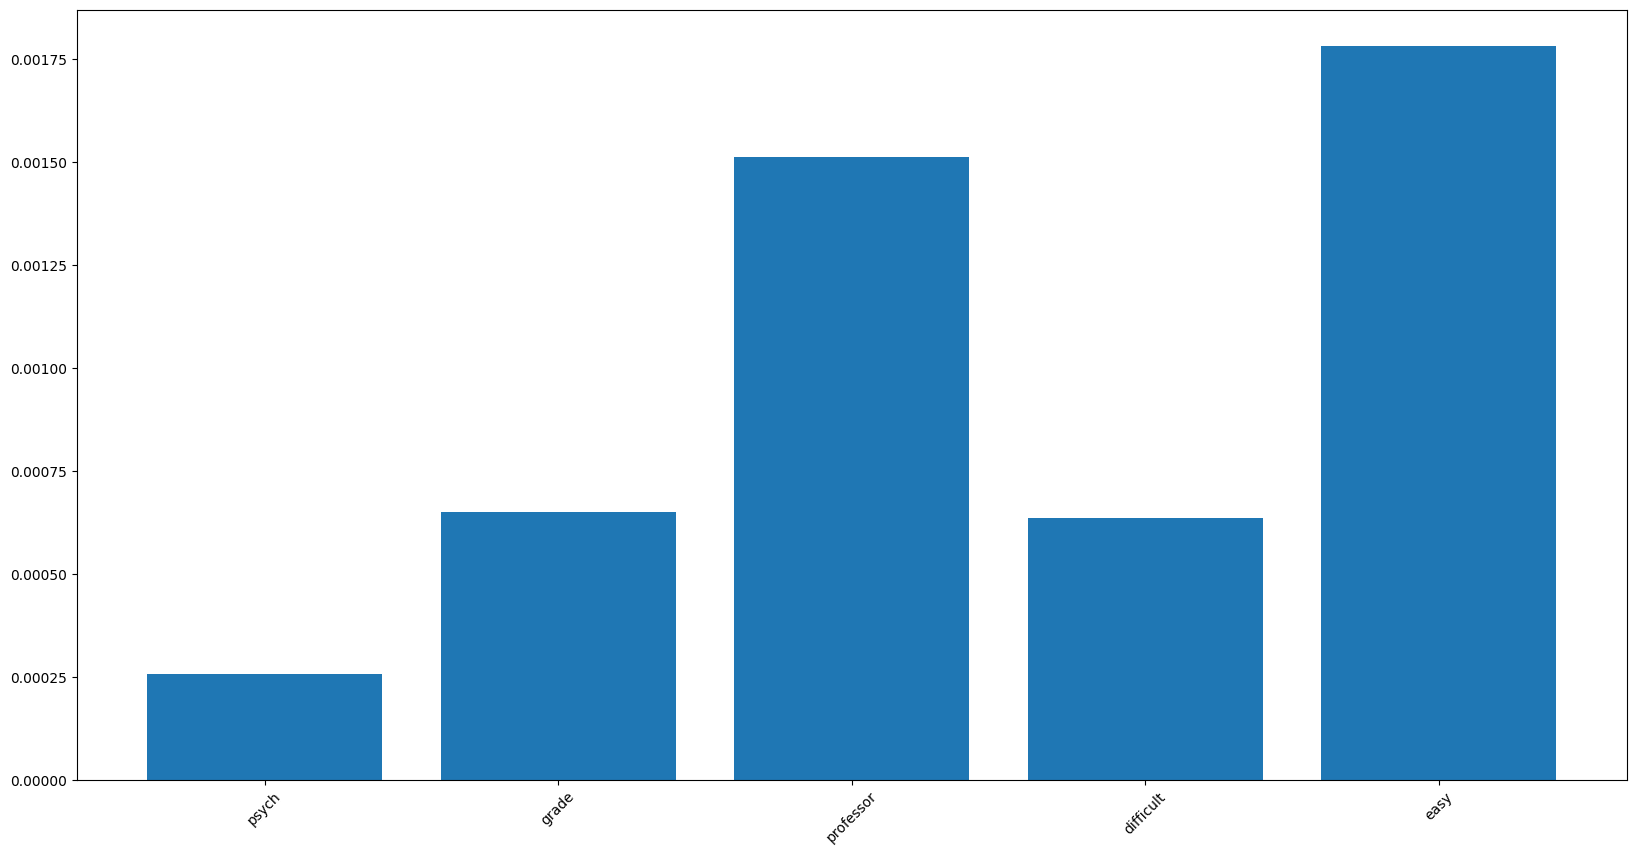

In [105]:
plt.figure(figsize=(20,10))
plt.bar(plot_list2.index, plot_list2.values)
plt.xticks(rotation=45)
plt.show()

After repeating this process with the UIUC dataset, I noticed some differences between this dataset and the Michigan dataset. The first difference I noticed was that the matrix was much larger for the Michigan dataset, meaning that it had more columns and rows than the UIUC dataset. One thing that was extremely similar about these datasets was how similar the most common words were before lemmitization. Both datasets contained the same top 5 most common stopwords which were the, to, and, you, and of. I was suprised to see that these words were the top five most common words for both datasets. However, after lemmitization, the most common words for each dataset became different from one another. The most common words for Michigan were not, student, like, people, and class while the most common words for UIUC were not, like, people, good, and time. This was suprising as again, both datasets shared common words which were not, like, and people. As for the other graphs, there was not huge differences between the datasets on how freuqent these specific words were said. Therefore, repeating this process with the UIUC dataset showed me just how similar the UIUC and Michigan subreddit actually are overall.

### Problem 3: using the provided combined dataframe, train a logistic regression model using the sklearn Logistic Regression implementation. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html. Create a bag of words table from the combined data, and use that along with the "label" column to train the classifier. Please try this out and be prepared with issues or questions next Monday. We will be discussing in class

In [106]:
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

mich=mich.sample(n=4725)

uiuc['label']=1
mich['label']=0

data=pd.concat([uiuc,mich])

In [107]:
import pandas as pd

In [108]:

def clean(text):

    text = text.lower()
 
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])

    text = ' '.join(text.split())
    return text

In [109]:
data = pd.concat([uiuc,mich])

In [110]:
data

,Unnamed: 0,date,post_votes,text,user,com_votes,label
0,0,2024-09-04 14:43:40,2,"Have the same professor! And in lecture he did say we were gonna have to learn some of the stuff ourself \r\n\r\nI would recommend using online resources such as Paul’s Online Math Notes and Professor Leonard on YouTube. Personally, I’ve been learning the material from those sources before going to lecture",zhen3441,2,1
1,1,2024-09-04 14:43:40,2,Do you find it helpful to still go to the lecture? It seems to me that his slides are embedded with mistakes here and there. It makes it more confusing for me to understand him.,Kai2747,1,1
2,2,2024-09-04 12:52:08,3,Have you tried emailing University Housing to request access?,TurboBKTastic,2,1
3,3,2024-09-04 12:52:08,3,"Purchasing Illini Cash should get you added to the Non-Resident Meal Plan card access level. These **generally** allow you access to whatever is considered the ""front door"" of the residence hall with access to the dining hall.\r\n\r\nAt PAR, that would be the doors facing the bus stop on the south side of the building. Only the mag stripe reader will work, prox access in (most) of the residence halls is currently only activated for residents with ADA needs.",HoosierCAB,2,1
4,4,2024-09-04 12:52:08,3,"Just did, thanks for the suggestion! It hadn't occurred to me to do that.",Sector-Both,1,1
...,...,...,...,...,...,...,...
2702,2702,2024-08-24 21:56:01,1,"Very disorganized, condescending staff and imo some of the staff doesn’t know how to answer questions so that makes me think they don’t really know the subject well. Staff makes too many mistakes on the homework and exams and they take for ever to respond on piazza and make a correction. By the time it was time to take finals, I swear to you the professor dreaded seeing my post and “error on final exam” or something like that because he would respond within 10 minutes than taking an entire week to respond. The final was curved like 15 points because there was way too much confusion on the final and regrade requests were turned off.",Sea_Ride456,1,0
1549,1549,2024-08-28 13:15:33,31,Turn it into DPSS or the front desk of the building. Pierpont should have an Mcard office,No-Emu2804,37,0
1742,1742,2024-08-27 23:13:02,202,And trying to draw an equivalency between not stopping a domestic holocaust and being annoyed with 20-year-olds LARPing on the Diag over a completely negligible facet (divestment) of a larger geopolitical issue which they have no power to actually influence tells you how delusional college activists are.,MourningCocktails,16,0
5469,5469,2024-07-30 02:34:35,6,They said they're doing interviews till last Thursday. Have u heard back?,forever_fiftyone,1,0


In [112]:
data['cleaned_text'] = data['text'].apply(clean)

In [113]:
data["cleaned_text"][0]

0    have the same professor and in lecture he did say we were gonna have to learn some of the stuff ourself i would recommend using online resources such as pauls online math notes and professor leonard on youtube personally ive been learning the material from those sources before going to lecture
0                                                                                                                                                                                                                                 zingermans has a nice reuben pretty pricey but the sammies are pretty big
Name: cleaned_text, dtype: object

In [114]:
data["label"][0]

0    1
0    0
Name: label, dtype: int64

In [115]:
data["label"].value_counts()

label
1    4725
0    4725
Name: count, dtype: int64

In [116]:
def lemmatize(text):

   doc = language_model(text)

   tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]

   return ' '.join(tokens)

In [117]:
data['lemmatized_text'] = data['cleaned_text'].apply(lemmatize)

In [119]:
vectorizer = CountVectorizer()
bag_of_wordsdata = vectorizer.fit_transform(data['cleaned_text'])

In [120]:
bag_of_wordsdata

<9450x15967 sparse matrix of type '<class 'numpy.int64'>'
	with 222806 stored elements in Compressed Sparse Row format>

In [121]:
column_names = data.columns 
print(column_names)

Index(['Unnamed: 0', 'date', 'post_votes', 'text', 'user', 'com_votes',
       'label', 'cleaned_text', 'lemmatized_text'],
      dtype='object')


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

vectorizer = CountVectorizer(min_df=3, max_df=0.3,)
X = vectorizer.fit_transform(data["cleaned_text"])

y = data["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
test_accuracy

0.6984126984126984

In [124]:
#report the accuracy of the model

This model is fairly accurate as it is about 69% accurate. However, it is not completely accurate and there is definetely room for improvement. 

#### Part 2: hold out part of the dataset using sklearn train_test_split (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Pass in your previously generated bag of words as X and the label column as y. Use only the X_train and y_train for training and hold out the X_test and y_test to score the model on unseen data.

**I used ChatGPT to help with the last two instructions of this code.

In [173]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


vectorizer = CountVectorizer(min_df=3, max_df=0.3,)
X = vectorizer.fit_transform(data["cleaned_text"])


y = data["label"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)

train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.8965608465608466


In [126]:
# what is the accuracy of the model? Is it better or worse than previous?Why do you think it has changed? 

The accuracy of this training model is much better than above as it is has about a 90% accuracy compared to the 69% accuracy of the test accuracy model. This makes sense because this model has been trained on this data, therefore we would expect it to make less errors due to familiarity. The accuracy of the test model above was much less than the accuracy of the training model due to the fact that the test model was being tested on unseen data which it has not encountered in the training process. 

#### Part 3: Examine the top features of your model using the following code

In [127]:
#get the coefficients of the model and plot the top 10 most positive and top 10 most negative coefficients
#what do you notice about these words? Are they surprising or expected?


*ChatGPT helped me with the feature_names line of this code.

In [128]:
feature_names = vectorizer.get_feature_names_out()

coefficients = pd.DataFrame({'feature': feature_names, 'coefficient': model.coef_[0]})
coefficients = coefficients.sort_values('coefficient', ascending=False)
top_10_positive = coefficients.head(10)
top_10_negative = coefficients.tail(10)
top_10_positive = pd.DataFrame(top_10_positive)
top_10_negative = pd.DataFrame(top_10_negative)
print ("Top 10 Positive Coefficients:")
print (top_10_positive)
print ("Top 10 Negative Coefficients:")
print (top_10_negative)

Top 10 Positive Coefficients:
        feature  coefficient
5448       uiuc     2.885382
2526   illinois     2.417929
5534     urbana     2.044480
4441       rsos     2.035319
2841        las     2.021705
2210   grainger     1.974770
820   champaign     1.956772
2525     illini     1.691017
3137   mckinley     1.606415
1240   danville     1.576771
Top 10 Negative Coefficients:
       feature  coefficient
5452        um    -1.625893
1590      eecs    -1.786184
1369      diag    -1.787282
3133     mcard    -1.831290
5655  waitlist    -1.850937
5196     texas    -2.011158
805    central    -2.066824
2051    fresno    -2.328806
5455     umich    -2.537659
3206  michigan    -2.960034


In [129]:
#examine these words and see if they make sense. Do they differentiate UIUC from another university?

After looking at the top 10 most positive and top 10 most negative words, the list did in fact make sense. The positive list, which matched to UIUC words, makes sense as it contains words such as "uiuc," "grainger," and "danville" while the negative list, which matched to UMich words, contained words such as "texas," "michigan," and "umich." Therefore, this model seemed to accurately differentiate UIUC words from UMich words.

### Problem 4: Train a 10 topic topic model from the UIUC subreddit data using Gensim LDA. (https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html) If you get here before Wednesday 9/11, don't rush to finish, but feel free to continue ahead. We will go through this in class. Print out the top words in each topic, and read through the words for each topic to decide the theme of the topic: remember this is subjective and there are no right or wrong answers. Print out a few comments with high frequencies of each topic and analyze if your topic labels were representative. 

In [130]:
!pip install gensim

In [201]:
from gensim import corpora
from gensim.models import LdaModel
from gensim.matutils import Sparse2Corpus
corpus = Sparse2Corpus(bag_of_words, documents_columns=False)
id2word = dict((v, k) for k, v in vectorizer.vocabulary_.items())

In [202]:
corpus

In [203]:
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=10)
lda_model.print_topics()

[(0,
  '0.018*"not" + 0.017*"like" + 0.010*"good" + 0.009*"check" + 0.009*"way" + 0.008*"go" + 0.008*"government" + 0.008*"find" + 0.007*"year" + 0.007*"sound"'),
 (1,
  '0.045*"not" + 0.035*"water" + 0.015*"tap" + 0.012*"tap water" + 0.011*"good" + 0.011*"school" + 0.008*"start" + 0.007*"people" + 0.007*"need" + 0.006*"building"'),
 (2,
  '0.029*"not" + 0.014*"weather" + 0.013*"people" + 0.010*"find" + 0.008*"drink" + 0.007*"quad day" + 0.007*"know" + 0.007*"campus" + 0.007*"quad" + 0.007*"need"'),
 (3,
  '0.028*"not" + 0.023*"go" + 0.013*"water" + 0.009*"know" + 0.009*"sorry" + 0.009*"time" + 0.008*"to" + 0.008*"say" + 0.007*"go to" + 0.007*"good"'),
 (4,
  '0.025*"not" + 0.017*"class" + 0.017*"student" + 0.016*"like" + 0.013*"friend" + 0.012*"year" + 0.011*"time" + 0.010*"week" + 0.009*"think" + 0.008*"freshman"'),
 (5,
  '0.034*"thank" + 0.014*"year" + 0.012*"not" + 0.012*"good" + 0.008*"chinese" + 0.008*"pay" + 0.008*"want" + 0.007*"talk" + 0.007*"ago" + 0.007*"yeah"'),
 (6,
  '0.

*The code above demonstrates 10 different topics identified by the model with the most common words identified for each topic. Although these topics are all different according to the model, it is a bit difficult to discriminate and label these topics. While some topics have some clearer themes such as topic 1 which includes words such as "tap" and "tap water," some topics seem a bit ambigious such as topic 8 which contains words such as "people,"thing," and "like." Most of these topics, however, seem to be about school and contain words that relate to university.

In [204]:
import pandas as pd
import textwrap

pd.set_option('display.max_colwidth', None)
toprint=uiuc['cleaned_text'][1714]
wrapped_string = textwrap.fill(toprint, width=80)
print(wrapped_string)

yeah totally fine she was super nice and i think she was a great lecturer but i
cant wait for cohen to come back hes the whole reason i took the class


In [205]:
lda_model.get_document_topics(corpus[1714])

[(1, 0.18780994), (3, 0.14465524), (4, 0.6286299)]

*The code above demonstrates a topic distrubution from a single review in the UIUC dataset. This comment is most associated with topic 6 which makes sense as it contains words such as "good," indicating a positive topic which does indeed coorelate with this positive comment.

In [206]:
models=lda_model.get_document_topics(corpus, minimum_probability=0)

In [207]:
rows=[]
for i in range(len(models)):
    row=[]
    for m in models[i]:
        row.append(m[1])
    rows.append(row)

topic_df=pd.DataFrame(rows)

In [208]:
topic_df.sort_values(3, ascending=False)

,0,1,2,3,4,5,6,7,8,9
710,0.002225,0.002225,0.002226,0.979972,0.002226,0.002225,0.002225,0.002225,0.002225,0.002226
423,0.002704,0.002703,0.002704,0.975664,0.002704,0.002704,0.002704,0.002704,0.002704,0.002704
1360,0.003340,0.003342,0.003338,0.969945,0.003338,0.003339,0.003339,0.003340,0.003339,0.003338
1281,0.003453,0.003454,0.003453,0.968921,0.003454,0.003453,0.003453,0.003454,0.003453,0.003453
855,0.003576,0.003577,0.003576,0.967812,0.003577,0.003577,0.003577,0.003576,0.003576,0.003577
...,...,...,...,...,...,...,...,...,...,...
3763,0.000841,0.000841,0.276074,0.000841,0.219309,0.000841,0.198516,0.033552,0.000841,0.268344
555,0.021434,0.043799,0.000822,0.000822,0.276534,0.020738,0.098759,0.180494,0.306182,0.050415
243,0.509749,0.000681,0.082773,0.000681,0.260586,0.000681,0.115085,0.000681,0.028401,0.000681
1366,0.045933,0.000634,0.000634,0.000634,0.245401,0.034748,0.274718,0.396033,0.000634,0.000634


In [221]:
import textwrap

pd.set_option('display.max_colwidth', None)
toprint=uiuc["cleaned_text"][1510]
wrapped_string = textwrap.fill(toprint, width=80)
print(wrapped_string)

im hoping main library parking lot gets this towing treatment saw three cars
parked on the side all day where there are no parking spots bmw hyundai and
toyota something they got tickets and another parked right next to the disabled
parking spot effectively making it unusable


In [222]:
lda_model.get_document_topics(corpus[1510])

[(0, 0.3709542),
 (1, 0.003339126),
 (2, 0.0033393828),
 (3, 0.0033383453),
 (4, 0.0033385344),
 (5, 0.0033384063),
 (6, 0.00333899),
 (7, 0.571145),
 (8, 0.003338668),
 (9, 0.034529366)]

**The above comment is most associated with topic 7 which did make sense to me as topic 7 includes words such as "not," "bike," and "bad" which all seem to coorelate with this individual not being able to find parking. 

Overall, because this is such a small dataset, I found the top words for each topic from this dataset were not very informative, making it slightly difficult to place each reddit comment from the UIUC subreddit into a specific category.